# <div align="center"> SPECIAL TOPICS III </div>
## <div align="center"> Data Science for Social Scientists  </div>
### <div align="center"> ECO 4199 </div>
#### <div align="center">Class 9 - Unsupervised Learning</div>
<div align="center"> Fabien Forge, (he/him)</div>

# Road Map
$$y=f(X) + \varepsilon$$
- Today we will not try to relate y to X because we do not truly have access to y


# Unsupervised Learning
- All our classes so far have used __supervised learning__ methods
    - We have learned to predict y based on X using observations of $\{ Y_i, X_i \}$
    - That is we observed values for y, given the values of our p predictors, for n observations
- Today, we will do something different called __unsupervised learning__
    - We are not interested in prediction, because we do not have an associated response variable Y
    -  Rather, the goal is to discover interesting things about the measurements on $X_1,X_2, \dots,X_p$. 

## What's the point of unsupervised learning
- Why would you unsupervised learning if you don't know what you are trying to predict?
- Because sometimes you care about classifying your data to find units that resemble each other
- For instance, you could be Amazon trying to predict what products to show me next
    - The only information Amazon has are my previous purchases and researches 
    - Amazon could use this to display other products I may like based on what other people with similar purchases and researches have bought 

# Clustering Methods

- Clustering refers to a very broad set of techniques for finding subgroups, or __clusters__
- When we cluster the observations of a data set, we seek to partition them into _distinct groups_ so that:
    - the observations within each group are _quite similar to each other_, 
    - the observations in different groups are _quite different_ from each other. 
- What makes observations similar is often a domain-specific consideration

# K-Means Clustering

- K-means clustering partitions the data set into K distinct, non-overlapping clusters. 
- To perform K-means clustering:
    1. First specify the desired number of clusters K
    2. K-means algorithm will assign each observation to exactly one of the K clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
# create simulated dataset based on two features and 4 distinct groups
X, y = make_blobs(n_samples=150, n_features=2, centers=4, cluster_std=2 , random_state=17)
df=pd.DataFrame(columns=['x1','x2'], data=X)
df['group']=y
df.sort_values('group',inplace=True)

df.head()

,x1,x2,group
149,-4.330097,-0.112468,0
110,-3.853246,-0.776623,0
107,-5.719420,0.874271,0
106,-6.437446,-3.460254,0
33,-3.124032,-0.281558,0


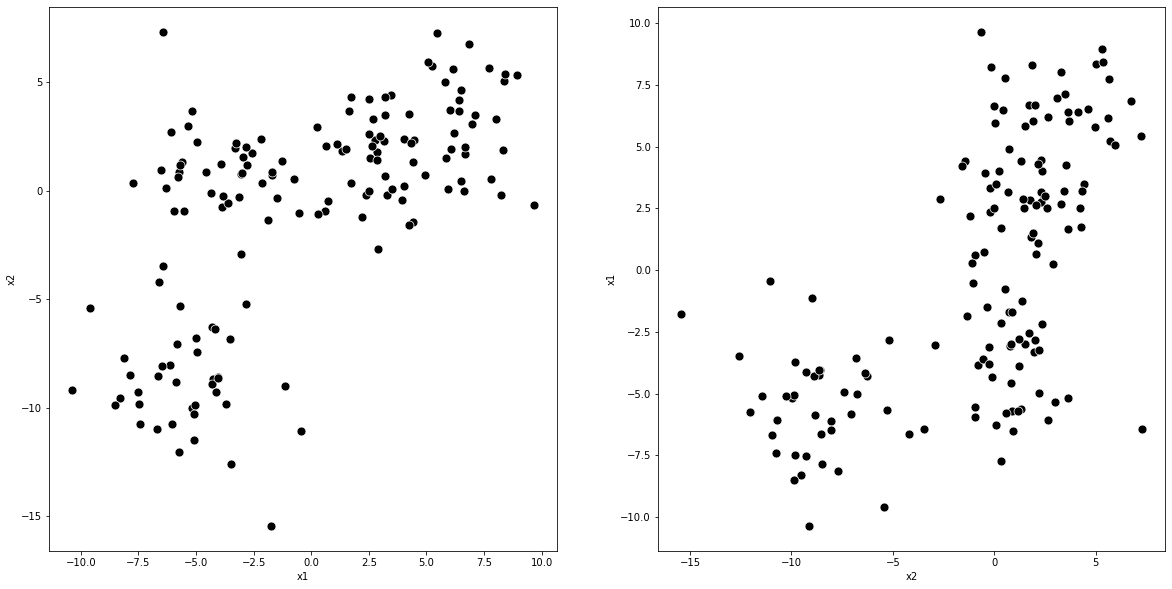

In [2]:
fig, axes =  plt.subplots(1,2, figsize=(20,10))
sns.scatterplot(x='x1',y='x2',color='k',s=80,data=df, ax=axes[0])
sns.scatterplot(x='x2',y='x1',color='k',s=80,data=df, ax=axes[1])

plt.show()

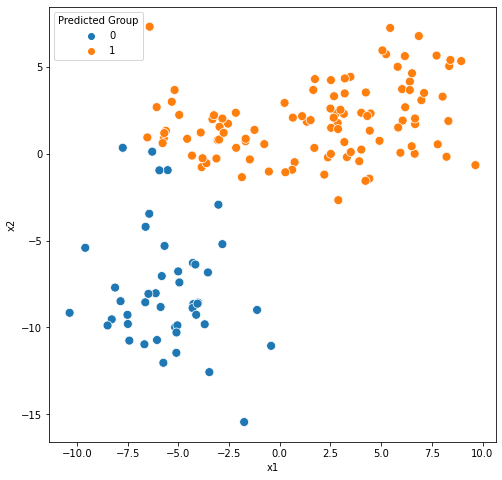

In [3]:
from sklearn.cluster import KMeans
x= df[['x1','x2']]
# cluster using 2 distinct groups
km2 = KMeans(n_clusters=2, n_init=20)
km2.fit(x)
df['Predicted Group']= km2.labels_
df.head()
fig, ax =  plt.subplots(1,1, figsize=(8,8))
sns.scatterplot(x='x1',y='x2',s=80,hue='Predicted Group',data=df)
plt.show()

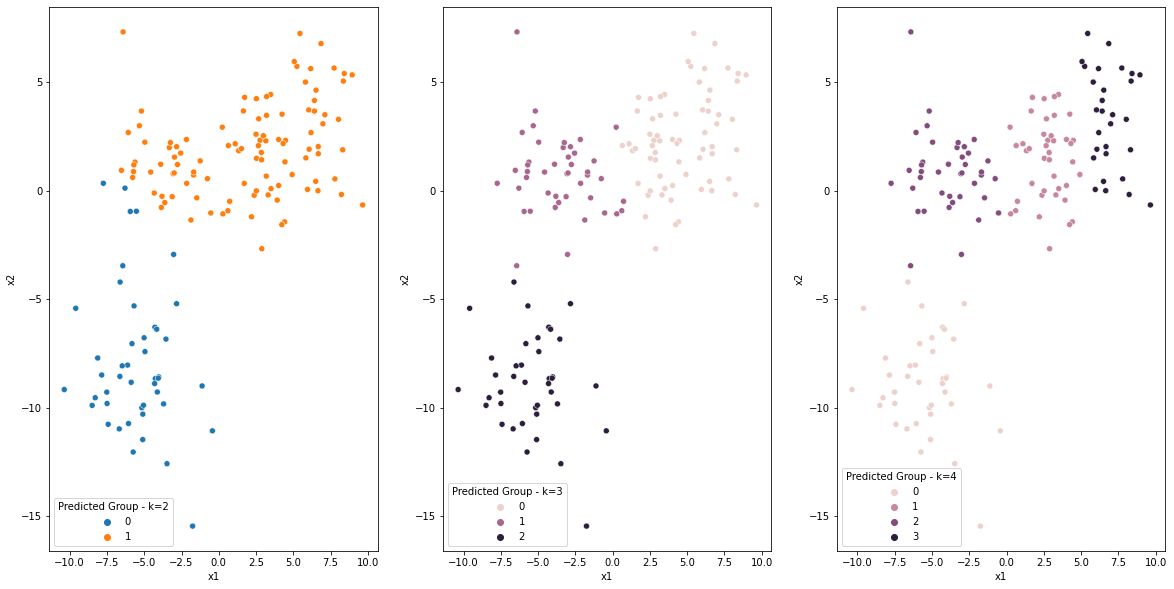

In [4]:
from sklearn.cluster import KMeans
k_list=[2,3,4]
x= df[['x1','x2']]
fig, axes =  plt.subplots(1,len(k_list), figsize=(20,10))

for i,k in enumerate(k_list):
    km = KMeans(n_clusters=k, n_init=20)
    km.fit(x)
    pred= f'Predicted Group - k={k}'
    df[pred]= km.labels_
    sns.scatterplot(x='x1',y='x2',hue=pred,data=df, ax=axes[i] )
    
    
plt.show()
    

In [5]:
display(df.groupby(['group','Predicted Group - k=4']).count())
# Give the labels the same value between actual and predicted
df['Predicted Group - k=4'].replace({2:0,0:2},inplace=True)
df.groupby(['group','Predicted Group - k=4']).count()

x1  x2  Predicted Group  Predicted Group - k=2  \
group Predicted Group - k=4                                                   
0     0                       1   1                1                      1   
      1                       2   2                2                      2   
      2                      35  35               35                     35   
1     0                      38  38               38                     38   
2     1                      11  11               11                     11   
      3                      26  26               26                     26   
3     1                      29  29               29                     29   
      2                       5   5                5                      5   
      3                       3   3                3                      3   

                             Predicted Group - k=3  
group Predicted Group - k=4                         
0     0                                          1  
      1                                          2  
      2                                         35  
1     0                                         38  
2     1                                         11  
      3                                         26  
3     1                                         29  
      2                                          5  
      3                                          3

x1  x2  Predicted Group  Predicted Group - k=2  \
group Predicted Group - k=4                                                   
0     0                      35  35               35                     35   
      1                       2   2                2                      2   
      2                       1   1                1                      1   
1     2                      38  38               38                     38   
2     1                      11  11               11                     11   
      3                      26  26               26                     26   
3     0                       5   5                5                      5   
      1                      29  29               29                     29   
      3                       3   3                3                      3   

                             Predicted Group - k=3  
group Predicted Group - k=4                         
0     0                                         35  
      1                                          2  
      2                                          1  
1     2                                         38  
2     1                                         11  
      3                                         26  
3     0                                          5  
      1                                         29  
      3                                          3

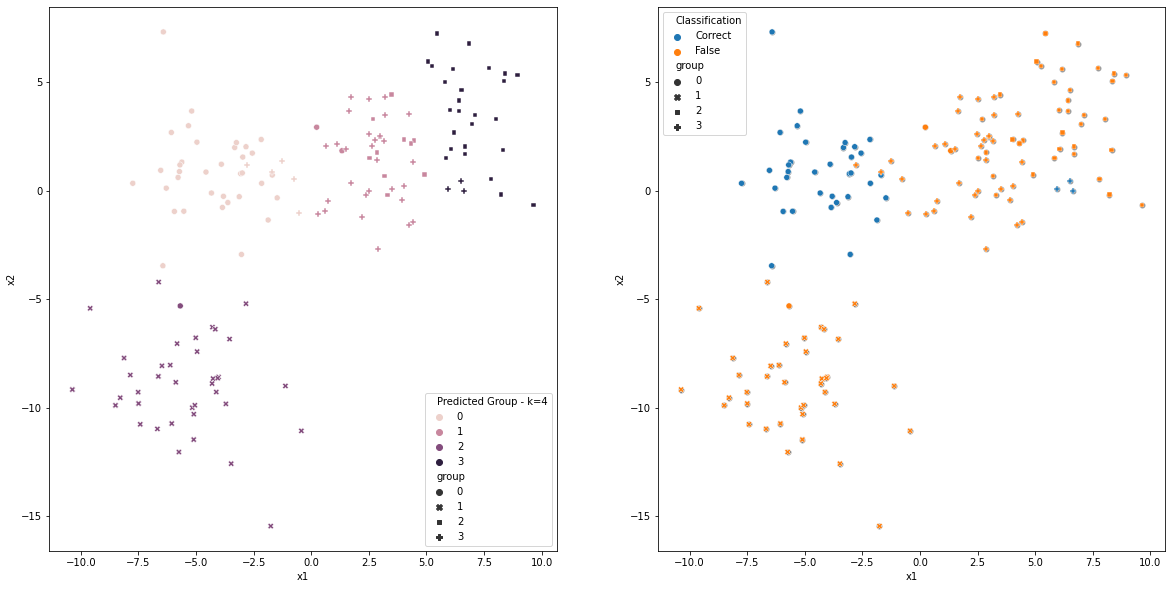

In [6]:
df.loc[df.group==df['Predicted Group - k=4'],'Classification']= 'Correct'
df.loc[df.group!=df['Predicted Group - k=4'],'Classification']= 'False'

fig, axes =  plt.subplots(1,2, figsize=(20,10))

sns.scatterplot(x='x1',y='x2', hue='Predicted Group - k=4', style='group',data=df, ax=axes[0] )
sns.scatterplot(x='x1',y='x2', color='k',alpha=.5,data=df, ax=axes[1] )
sns.scatterplot(x='x1',y='x2', hue='Classification', style='group',data=df, ax=axes[1] )

plt.show()

## k-means explained:  notation
- Let $C_1, \dots, C_K$  denote sets containing the indices of the observations in each cluster. 
- These sets satisfy two properties:
    1. $C_1\cup C_2 \cup \dots \cup C_K = \{1, \dots, n\}$. In other words, each observation belongs to at least one of the K clusters.
    2. $C_k ∩ C_{k'} = \emptyset$ for all $k \neq k'$. In other words, the clusters are nonoverlapping: no observation belongs to more than one cluster.
    - if the $i_{th}$ observation is in the $k_{th}$ cluster, then $i \in C_k$.
- A good clustering is one for which the within-cluster variation is as small as possible
- Let the measure of within-cluster variation for cluster k be given by $W(C_k)$

## k-means explained: minization problem
$$\min_{C_1, \dots, C_K} \left\{ \sum_{k=1}^K W(C_k) \right\}$$
- This formula says that we want to partition the observations into K clusters such that the total within-cluster variation, summed over all K clusters, is as small as possible.
-  The question thus become, according to which metrics should within-cluster variation be measured?
    - most common choice involves __squared Euclidean distance__
    - This is conceptually close to minizing the mean squarred errors but recall that we do not have a y here

## k-means explained: Euclidean distance
$$ \large W(C_k) = \frac{1}{\left|C_k\right|} \sum_{i, i' \in C_k} \sum_{j=1}^p(x_{ij} - x_{i'j})^2$$
- where $\left|C_k\right|$ denotes the number of observations in the $k_{th}$ cluster. 
- This is the sum of all of the pairwise squared Euclidean distances between the observations in the $k_{th}$ cluster, divided by the total number of observations in the $k_{th}$ cluster.


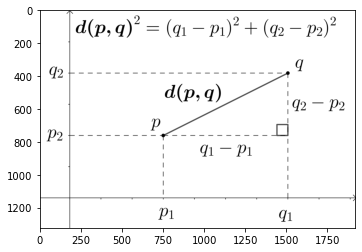

In [7]:
import matplotlib.image as mpimg
img = mpimg.imread('euclidian_distance.png')
plt.imshow(img)

## k-means explained: solution
Combining the last two equations yields the optimization problem that defines K-means clustering:

$$\min_{C_1, \dots, C_K} \left\{ \sum_{k=1}^K \frac{1}{\left|C_k\right|} 
\sum_{i, i' \in C_k} \sum_{j=1}^p(x_{ij} - x_{i'j})^2 \right\}$$

## k-means explained: algorithm

1. Randomly assign a number, from 1 to K, to each of the observations.
    - These serve as initial cluster assignments for the observations.
2. Iterate until the cluster assignments stop changing:
    - (a) For each of the K clusters, compute the cluster centroid. The kth cluster centroid is the vector of the p feature means for the observations in the kth cluster.
    - (b) Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).

## k-means explained: algorithm continued

- The algorithm is guaranteed to decrease the value of the objective at each step, since:

$$ \frac{1}{\left|C_k\right|} \sum_{i, i' \in C_k} \sum_{j=1}^p(x_{ij} - x_{i'j})^2 = 
2 \sum_{i \in C_k} \sum_{j=1}^p(x_{ij} - \bar{x}_{kj})^2$$

- where $  \bar{x}_{kj} = \frac{1}{\left|C_k\right|}  \sum_{i \in C_k} x_{ij}$ is the mean for feature j in cluster $C_k$

![](sphx_glr_plot_kmeans_digits_001.png)
Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

# Hierarchical Clustering
- One potential disadvantage of K-means clustering is that it requires us to pre-specify the number of clusters K. 
- Hierarchical clustering is an alternative approach which does not require that we commit to a particular choice of K. 
- Hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based representation of the observations, called a __dendrogram__.
- Like tree-based methods the tree is generally depicted upside-down (with leaves at the bottom)
- __Bottom-up__ or __agglomerative clustering__ is the most common type of hierarchical clustering
- The dendogram is built starting from the leaves and combining clusters up to the trunk.

,x1,x2,group
0,-12.232333,-3.484517,1
1,-9.953110,-9.162160,2
2,-6.433612,-12.197631,2
3,-2.304394,3.638381,0
4,0.607979,2.206707,0


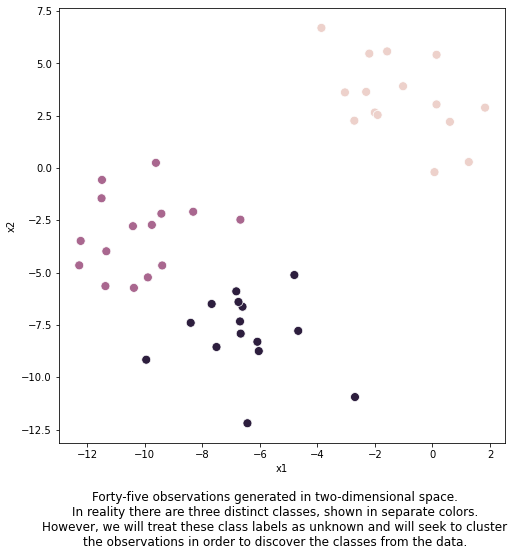

In [8]:
# create simulated dataset based on two features and 4 distinct groups
X, y = make_blobs(n_samples=45, n_features=2, centers=3, cluster_std=2 , random_state=1)
df=pd.DataFrame(columns=['x1','x2'], data=X)
df['group']=y
display(df.head())

txt="Forty-five observations generated in two-dimensional space.\nIn reality there are three distinct classes, shown in separate colors.\nHowever, we will treat these class labels as unknown and will seek to cluster\nthe observations in order to discover the classes from the data."
fig, ax =  plt.subplots(1,1, figsize=(8,8))
sns.scatterplot(x='x1',y='x2',hue='group',s=80,legend=False,data=df)
fig.text(0.5, -.05, txt, ha='center', wrap=True, fontsize=12)

plt.show()

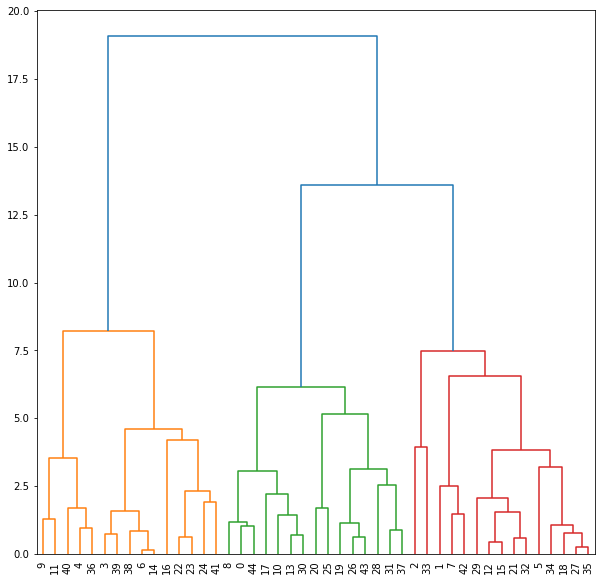

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(df[['x1','x2']], method='complete')

fig, ax=plt.subplots(1,1,figsize=(10,10))
dendrogram(mergings,leaf_rotation=90,leaf_font_size=10, ax=ax)

plt.show()


In [10]:
df.head()

,x1,x2,group
0,-12.232333,-3.484517,1
1,-9.953110,-9.162160,2
2,-6.433612,-12.197631,2
3,-2.304394,3.638381,0
4,0.607979,2.206707,0


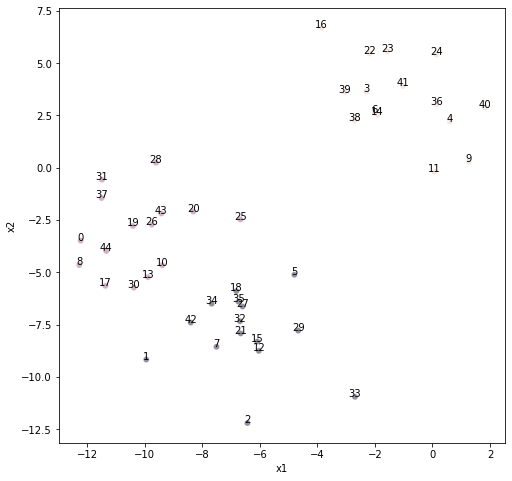

In [11]:

    
fig, ax =  plt.subplots(1,1, figsize=(8,8))
sns.scatterplot(x='x1',y='x2',hue='group',alpha=0.5,legend=False,data=df)
for i in df.index:
    ax.annotate(i, (df.x1.loc[i], df.x2.loc[i]), ha='center')
plt.show()

## Interpreting a Dendogram
- In the figure above, each _leaf_ of the dendrogram represents one of the 45 observations in the previous figure.
- However, as we move up the tree, some leaves begin to fuse into _branches_
    - These correspond to observations that are similar to each other
- As we move higher up the tree, branches themselves fuse, either with leaves or other branches. 
- The earlier (lower in the tree) fusions occur, the more similar the groups of observations are to each other
- On the other hand, observations that fuse later (near the top of the tree) can be quite different. 
    - for any two observations, we can look for the point in the tree where branches containing those two observations are first fused
    - The height of this fusion, as measured on the vertical axis, indicates how different the two observations are.
- the height of the cut to the dendrogram serves the same role as the K in K-means clustering: it controls the number of clusters obtained
    - here the optimal cut is at 10

# Principal Component analysis

- Clustering looks to find homogeneous subgroups among the observations but is not very informative about their interactions
- Principal component analysis (PCA) looks to find a low-dimensional representation of the observations that explain a good fraction of the variance
- PCA refers to the process by which principal components are computed, and the subsequent use of these components in understanding the data. 
- PCA is another unsupervised approach, since it involves only a set of features $X_1,X_2, \dots , X_p$, and no associated response Y. 
- PCA is a technique for reducing the dimension of a $n \times p$ data matrix X.
- The first principal component direction of the data is that along which the observations vary the most.

## What Are Principal Components?
- Suppose that we wish to visualize n observations with measurements on a set of p features, $X_1,X_2, . . .,X_p$, as part of an exploratory data analysis.
- We could do this by examining two-dimensional scatterplots of the data, each of which contains the n observations’ measurements on two of the features. 
    - However, there are ${p \choose 2} =p(p−1)/2 $ such scatterplots
    - for example, with p = 10 there are 45 plots
- If p is large, then it will certainly not be most likely none of them will be informative since they each contain just a small fraction of the total information present in the data set.

In [12]:
df=pd.read_csv("USArrests.csv", index_col=0)
display(df.head())
df.info()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


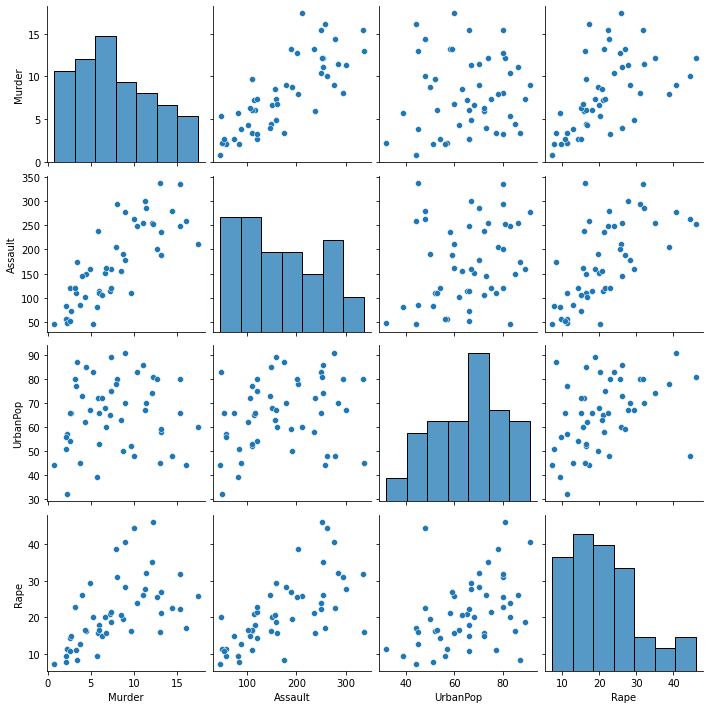

In [13]:
sns.pairplot(df)

## First principal component
- The first principal component of a set of features $X_1,X_2, . . . , X_p$ is the normalized linear combination of the features, that has the largest variance.
$$Z_1 = \phi_{11}X_1 + \phi_{21}X_2 + \dots + \phi_{p1}X_p$$
- Normalized means: $\sum_{j=1}^p\phi_{j1}^2=1$, their sum of squares is equal to one
    - otherwise setting these elements to be arbitrarily large in absolute value could result in an arbitrarily large variance
- $\phi_{11}, \dots, \phi_{p1}$ are called __loadings__ of the principal first component
    - $(\phi_{11}, \dots, \phi_{p1})^T = $ the principal component loading vector $\phi_{1}$

## Computing the first principal component
- Since we are only interested in variance, we assume that each of the variables in X has been centered to have mean zero 
- We then look for the linear combination of the sample feature values of the form:
$$z_{i1} = \phi_{11}x_{i1} + \phi_{21}x_{i2} + \dots + \phi_{p1}x_{ip}$$
- First principal component loading vector solves the optimization problem
$$\large \max_{\phi_{11}, \dots, \phi_{p1}} \left\{\frac{1}{n} \sum_{i=1}^n \left( \sum_{j=1}^p \phi_{j1}x_{ij} \right) \right\} \text{s.t.} \sum_{j=1}^p\phi_{j1}^2=1$$

## Geometric interpretation of FPC
- The loading vector $\phi_{1}$ defines a direction in feature space along which the data vary the most
    - $z_1 = \phi_{11}x_{i1} + \phi_{21}x_{i2} =0.839 \times (pop − \bar{pop}) + 0.544 \times (ad − \bar{ad})$
![](figure6_4.png)

## Second principal component
- The second principal component is the linear combination of $X_1, . . . , X_p$ that has maximal variance out of all linear combinations that are __uncorrelated with $Z_1$__.

$$z_{i2} = \phi_{12}x_{i1} + \phi_{22}x_{i2} + \dots + \phi_{p2}x_{ip}$$

- Constraining $Z_2$ to be uncorrelated with $Z_1$ is equivalent to constraining the direction $\phi_2$ to be orthogonal (perpendicular) to the direction $\phi_1$
- Once we have computed the principal components, we can plot them against each other in order to produce low-dimensional views of the data.

### Illustration
- To finish, we will illustrate the use of principal components using the USArrests data
    - We used it for the pair plot above
- For each of the 50 states in the United States, the data set contains:
    - the number of arrests per 100, 000 residents for each of three crimes: 
        - Assault, Murder, and Rape.
- It also has records of UrbanPop (the percent of the population in each state living in urban areas). 
- The principal component score vectors have length n = 50, and the principal component loading vectors have length $p = 4$ 


In [14]:
display(df.head())
df.describe().T.loc[:,['mean','std']]

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


,mean,std
Murder,7.788,4.355510
Assault,170.760,83.337661
UrbanPop,65.540,14.474763
Rape,21.232,9.366385


In [15]:
from sklearn.preprocessing import scale

X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
X.describe().T.loc[:,['mean','std']] # mean zero and std of 1

,mean,std
Murder,-8.437695e-17,1.010153
Assault,1.298961e-16,1.010153
UrbanPop,-4.263256e-16,1.010153
Rape,8.326673e-16,1.010153


In [16]:
from sklearn.decomposition import PCA
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=[r'$\phi_1$', r'$\phi_2$', r'$\phi_3$', r'$\phi_4$'])
pca_loadings

,$\phi_1$,$\phi_2$,$\phi_3$,$\phi_4$
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [17]:
np.square(pca_loadings).sum().reset_index().rename(columns={'index': 'Loading Vector', 0:"Loadings sum of squares"})

,Loading Vector,Loadings sum of squares
0,$\phi_1$,1.0
1,$\phi_2$,1.0
2,$\phi_3$,1.0
3,$\phi_4$,1.0


In [18]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


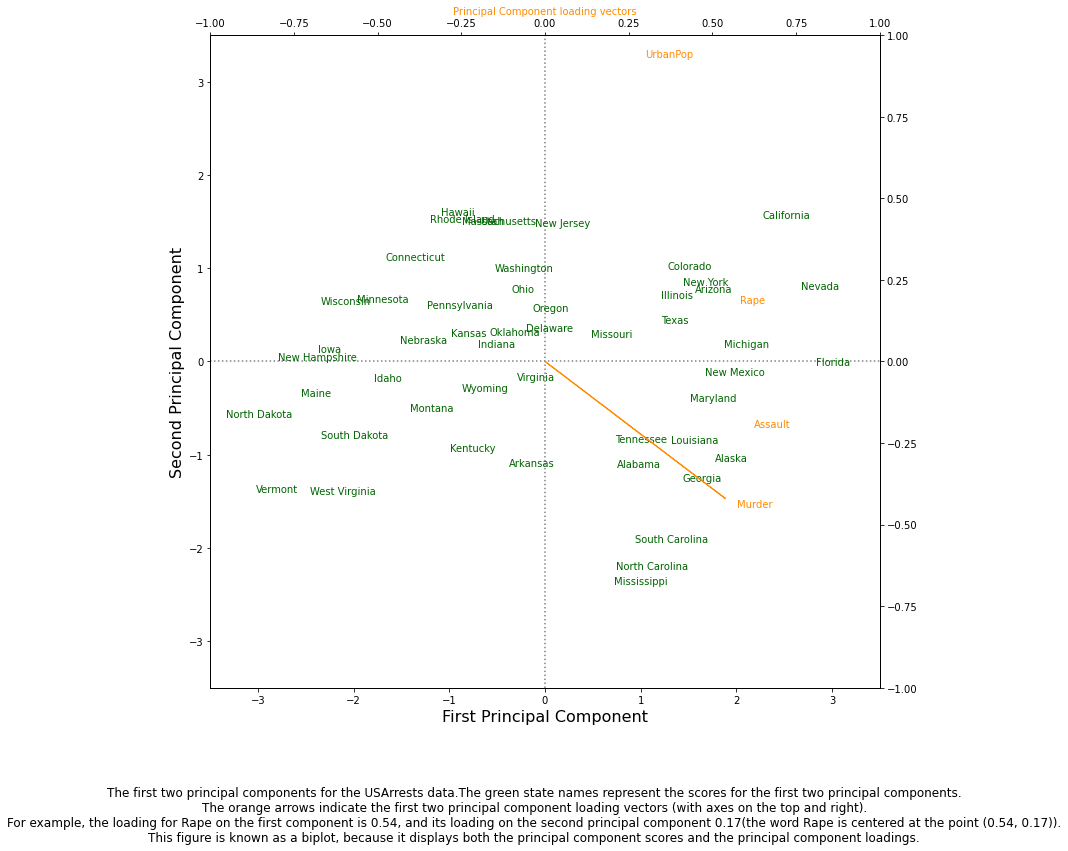

In [20]:
fig , ax1 = plt.subplots(figsize=(12,12))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center', color='darkgreen')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component',fontsize=16)
ax1.set_ylabel('Second Principal Component',fontsize=16)
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='darkorange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[[r'$\phi_1$', r'$\phi_2$']].index:
    ax2.annotate(i, (pca_loadings[r'$\phi_1$'].loc[i]*a, -pca_loadings[r'$\phi_2$'].loc[i]*a), color='darkorange')

# Plot vectors
ax2.arrow(0,0,pca_loadings[r'$\phi_1$'][0], -pca_loadings[r'$\phi_2$'][0], color='darkorange')
# ax2.arrow(0,0,pca_loadings[r'$\phi_1$'][1], -pca_loadings[r'$\phi_2$'][1], color='darkorange')
# ax2.arrow(0,0,pca_loadings[r'$\phi_1$'][2], -pca_loadings[r'$\phi_2$'][2], color='darkorange')
# ax2.arrow(0,0,pca_loadings[r'$\phi_1$'][3], -pca_loadings[r'$\phi_2$'][3], color='darkorange')

txt= "The first two principal components for the USArrests data.\
The green state names represent the scores for the first two principal components.\n\
The orange arrows indicate the first two principal component loading vectors (with axes on the top and right).\n\
For example, the loading for Rape on the first component is 0.54, and its loading on the second principal component 0.17\
(the word Rape is centered at the point (0.54, 0.17)).\n\
This figure is known as a biplot, because it displays both the principal component scores and the principal component loadings."

fig.text(0.5, -.05, txt, ha='center', wrap=True, fontsize=12)

plt.show()

## Why did we scale the variables?
![](figure10.png)